In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRFRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV
import ipywidgets
from ipywidgets import interact,interact_manual

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
#Reading the training dataset
df_train=pd.read_excel('Data_Train.xlsx')

In [4]:
df_train.shape

(10683, 11)

In [5]:
#Checking the percantage of the unique values in each column of the datset
for col in df_train.columns:
    print("The unique percentage of the column",col,"is",len(df_train[col].unique())/len(df_train))

The unique percentage of the column Airline is 0.0011232799775344005
The unique percentage of the column Date_of_Journey is 0.004118693250959468
The unique percentage of the column Source is 0.00046803332397266686
The unique percentage of the column Destination is 0.0005616399887672002
The unique percentage of the column Route is 0.012075259758494805
The unique percentage of the column Dep_Time is 0.020780679584386407
The unique percentage of the column Arrival_Time is 0.1257137508190583
The unique percentage of the column Duration is 0.03444725264438828
The unique percentage of the column Total_Stops is 0.0005616399887672002
The unique percentage of the column Additional_Info is 0.0009360666479453337
The unique percentage of the column Price is 0.1750444631657774


In [6]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
#Checking the null values in the dataset
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Feature engineering

In [11]:
df_train['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [12]:
df_train['Arrival_Time']=df_train['Arrival_Time'].apply(lambda x:x.split(' ')[0])
df_train['Arrival_hour']=df_train['Arrival_Time'].apply(lambda x: x.split(':')[0])
df_train['Arrival_Minutes']=df_train['Arrival_Time'].apply(lambda x:x.split(':')[1])

In [13]:
#Converting the oobject datatypes into the integer datatypes
df_train['Arrival_hour']=df_train['Arrival_hour'].astype(int)
df_train['Arrival_Minutes']=df_train['Arrival_Minutes'].astype(int)

In [14]:
#Dropping the Arrival_Time feture from the dataset
df_train.drop('Arrival_Time',axis=1,inplace=True)

In [15]:
#Handling the categorical feature Dep_Time
df_train['Dep_hour']=df_train['Dep_Time'].apply(lambda x: x.split(':')[0])
df_train['Dep_minutes']=df_train['Dep_Time'].apply(lambda x: x.split(':')[1])

In [16]:
#Converting the object datatypes into the integer datatypes
df_train['Dep_hour']=df_train['Dep_hour'].astype(int)
df_train['Dep_minutes']=df_train['Dep_minutes'].astype(int)

In [17]:
#Dropping the Dep_Time feature from the dataset
df_train.drop('Dep_Time',axis=1,inplace=True)

In [18]:
#Handling the categorical feature Duration
df_train['Duration_hour']=df_train['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [19]:
#Dropping the Duration feature from the dataset
df_train.drop('Duration',axis=1,inplace=True)

In [20]:
df_train[df_train['Duration_hour']=='5m']

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_Minutes,Dep_hour,Dep_minutes,Duration_hour
6474,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,2 stops,No info,17327,16,55,16,50,5m


In [21]:
df_train.drop(6474,axis=0,inplace=True)

In [22]:
#converting the object datatypes into the integer datatypes
df_train['Duration_hour']=df_train['Duration_hour'].astype(int)

In [23]:
#Handling the categorical feature Date_of_Journey
df_train['Day']=df_train['Date_of_Journey'].apply(lambda x:x.split('/')[0])
df_train['Month']=df_train['Date_of_Journey'].apply(lambda x:x.split('/')[1])
df_train['Year']=df_train['Date_of_Journey'].apply(lambda x:x.split('/')[2])

In [24]:
#Converting the ojbject datatypes into the integer datatypes
df_train['Day']=df_train['Day'].astype(int)
df_train['Month']=df_train['Month'].astype(int)
df_train['Year']=df_train['Year'].astype(int)

In [25]:
#Dropping the Date_of_Journey feature from the dataset
df_train.drop('Date_of_Journey',axis=1,inplace=True)

In [26]:
#Handling the categorical feature Total_Stops by using the ordinal encoding technique
df_train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [27]:
df_train['Total_Stops']=df_train['Total_Stops'].map({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4,'nan':5})

In [28]:
#Dropping the Categorical feature Route
df_train.drop('Route',axis=1,inplace=True)

In [29]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_Minutes,Dep_hour,Dep_minutes,Duration_hour,Day,Month,Year
0,IndiGo,Banglore,New Delhi,0.0,No info,3897,1,10,22,20,2,24,3,2019
1,Air India,Kolkata,Banglore,2.0,No info,7662,13,15,5,50,7,1,5,2019
2,Jet Airways,Delhi,Cochin,2.0,No info,13882,4,25,9,25,19,9,6,2019
3,IndiGo,Kolkata,Banglore,1.0,No info,6218,23,30,18,5,5,12,5,2019
4,IndiGo,Banglore,New Delhi,1.0,No info,13302,21,35,16,50,4,1,3,2019


In [30]:
#Data preprocessing
le=LabelEncoder()
df_train['Airline']=le.fit_transform(df_train['Airline'])
df_train['Source']=le.fit_transform(df_train['Source'])
df_train['Destination']=le.fit_transform(df_train['Destination'])
df_train['Additional_Info']=le.fit_transform(df_train['Additional_Info'])

In [31]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_Minutes,Dep_hour,Dep_minutes,Duration_hour,Day,Month,Year
0,3,0,5,0.0,8,3897,1,10,22,20,2,24,3,2019
1,1,3,0,2.0,8,7662,13,15,5,50,7,1,5,2019
2,4,2,1,2.0,8,13882,4,25,9,25,19,9,6,2019
3,3,3,0,1.0,8,6218,23,30,18,5,5,12,5,2019
4,3,0,5,1.0,8,13302,21,35,16,50,4,1,3,2019


In [32]:
#Reading the testing dataset
df_test=pd.read_excel('Test_set.xlsx')

In [33]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [34]:
df_test.shape

(2671, 10)

In [35]:
#checking the null values in the testing dataset
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

# Feature engineering

In [38]:
df_test[df_test['Duration_hour']=='5m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Duration_hour
2660,Air India,12/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No info,5m


In [39]:
df_test.drop(2660,axis=0,inplace=True)

In [40]:
df_test['Total_Stops'].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [41]:
df_test['Duration_hour']=df_test['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [42]:
#Handling the categrical feature Duration

#Converting the duration_hour into the integer datatypes
df_test['Duration_hour']=df_test['Duration_hour'].astype(int)
#Dropping the duration column from the dataset
df_test.drop('Duration',axis=1,inplace=True)
#Handling the categorical feature Arrival_Time
df_test['Arrival_Time']=df_test['Arrival_Time'].apply(lambda x: x.split(' ')[0])
df_test['Arrival_hour']=df_test['Arrival_Time'].apply(lambda x:x.split(':')[0])
df_test['Arrival_Minutes']=df_test['Arrival_Time'].apply(lambda x:x.split(':')[1])
#Converting the object datatypes into the integer datatypes
df_test['Arrival_hour']=df_test['Arrival_hour'].astype(int)
df_test['Arrival_Minutes']=df_test['Arrival_Minutes'].astype(int)
#Dropping the Arrival_Time columns from the dataset
df_test.drop('Arrival_Time',axis=1,inplace=True)
#Handling the categorical feature Dep_Time
df_test['Dep_hour']=df_test['Dep_Time'].apply(lambda x:x.split(':')[0])
df_test['Dep_Minutes']=df_test['Dep_Time'].apply(lambda x:x.split(':')[1])
#Converting the object datatypes into the integer datatypes
df_test['Dep_hour']=df_test['Dep_hour'].astype(int)
df_test['Dep_Minutes']=df_test['Dep_Minutes'].astype(int)
#Dropping the Dep_Time columns from the dataset
df_test.drop('Dep_Time',axis=1,inplace=True)
#Handling the categorical feature Date_of_Journey 
df_test['Day']=df_test['Date_of_Journey'].apply(lambda x:x.split('/')[0])
df_test['Month']=df_test['Date_of_Journey'].apply(lambda x:x.split('/')[1])
df_test['Year']=df_test['Date_of_Journey'].apply(lambda x:x.split('/')[2])
#Converting the object datatypes into the integr datatypes
df_test['Day']=df_test['Day'].astype(int)
df_test['Month']=df_test['Month'].astype(int)
df_test['Year']=df_test['Year'].astype(int)
#Dropping the categorical feature Date_of_Journey from the dataset
df_test.drop('Date_of_Journey',axis=1,inplace=True)
#Handling the categorical column Total_Stops by using the ordinal encoding
df_test['Total_Stops']=df_test['Total_Stops'].map({'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'non-stop':0})

In [43]:
df_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration_hour,Arrival_hour,Arrival_Minutes,Dep_hour,Dep_Minutes,Day,Month,Year
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,No info,10,4,25,17,30,6,6,2019
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1,No info,4,10,20,6,20,12,5,2019
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,In-flight meal not included,23,19,0,19,15,21,5,2019
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1,No info,13,21,0,8,0,21,5,2019
4,Air Asia,Banglore,Delhi,BLR → DEL,0,No info,2,2,45,23,55,24,6,2019


In [44]:
#Dropping the categorical column Route from the dataset
df_test.drop('Route',axis=1,inplace=True)

In [45]:
#Handling the categorical column by using the label encoder
d_types=df_test.dtypes
for name,type in (d_types.items()):
    if str(type)=='object':
        le=LabelEncoder()
        df_test[name]=le.fit_transform(df_test[name])

In [46]:
df_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Duration_hour,Arrival_hour,Arrival_Minutes,Dep_hour,Dep_Minutes,Day,Month,Year
0,4,2,1,1,5,10,4,25,17,30,6,6,2019
1,3,3,0,1,5,4,10,20,6,20,12,5,2019
2,4,2,1,1,3,23,19,0,19,15,21,5,2019
3,6,2,1,1,5,13,21,0,8,0,21,5,2019
4,0,0,2,0,5,2,2,45,23,55,24,6,2019


In [47]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_Minutes,Dep_hour,Dep_minutes,Duration_hour,Day,Month,Year
0,3,0,5,0.0,8,3897,1,10,22,20,2,24,3,2019
1,1,3,0,2.0,8,7662,13,15,5,50,7,1,5,2019
2,4,2,1,2.0,8,13882,4,25,9,25,19,9,6,2019
3,3,3,0,1.0,8,6218,23,30,18,5,5,12,5,2019
4,3,0,5,1.0,8,13302,21,35,16,50,4,1,3,2019


In [50]:
#Creating the independent and the dependent feature
x=df_train.loc[:,['Airline','Source','Destination','Total_Stops','Additional_Info','Arrival_hour','Arrival_Minutes','Dep_hour','Dep_minutes','Duration_hour','Day','Month','Year']]
y=df_train['Price']

In [49]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [51]:
x.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Arrival_hour,Arrival_Minutes,Dep_hour,Dep_minutes,Duration_hour,Day,Month,Year
0,3,0,5,0.0,8,1,10,22,20,2,24,3,2019
1,1,3,0,2.0,8,13,15,5,50,7,1,5,2019
2,4,2,1,2.0,8,4,25,9,25,19,9,6,2019
3,3,3,0,1.0,8,23,30,18,5,5,12,5,2019
4,3,0,5,1.0,8,21,35,16,50,4,1,3,2019


In [54]:
x.isnull().sum()
x['Total_Stops']=x['Total_Stops'].fillna(5)

In [55]:
#Important feature using the extra tree regressor
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [57]:
print(selection.feature_importances_)

[0.16032347 0.01916521 0.05174025 0.23343324 0.05861253 0.03194206
 0.02582263 0.02703812 0.02923041 0.18220253 0.12903321 0.05145634
 0.        ]


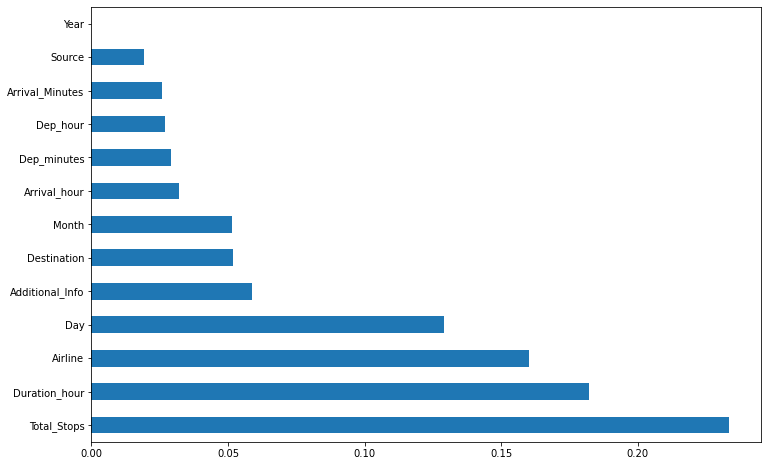

In [58]:
#Plot graph of feature importance for better visualization
plt.figure(figsize=(12,8))
feat_importance=pd.Series(selection.feature_importances_,index=x.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

# modelling

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("Shape of x_train",x_train.shape)
print("Shape of x_test",x_test.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)

Shape of x_train (8545, 13)
Shape of x_test (2137, 13)
shape of y_train (8545,)
shape of y_test (2137,)


In [60]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [61]:
rf.score(x_test,y_test)

0.8340202452245014

In [62]:
rf.score(x_train,y_train)

0.9800755786043771

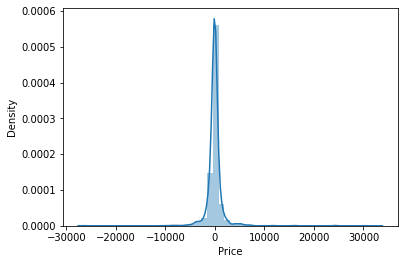

In [63]:
sns.distplot(y_test-y_pred)
plt.show()

In [64]:
print("R2 score",r2_score(y_test,y_pred))

R2 score 0.8340202452245014


In [66]:
print("Mean absolute error",mean_absolute_error(y_test,y_pred))
print("Mean squared error",mean_squared_error(y_test,y_pred))
print("Root mean squared:",np.sqrt(mean_squared_error(y_test,y_pred)))

Mean absolute error 748.0136416229614
Mean squared error 3807917.9112990513
Root mean squared: 1951.388713531738


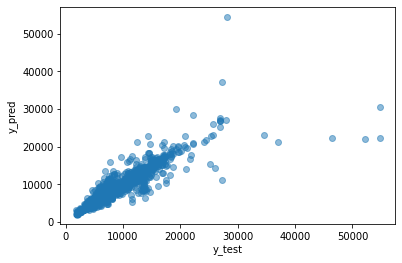

In [67]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [77]:
#Randomized seach cv
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#number of feature to be considered at every split
max_features=['auto','sqrt']
#Mawximum number of levels in the tree
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
#Minimum number of sample required to split a node
min_samples_split=[2,5,10,15,100]
#Minimum number of sample required at each node
min_samples_leaf=[1,2,5,10]

In [79]:
#Create the random grid
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

In [80]:
#Random search of parameter using the 5Fold cross validation
#seach across 100 different combinations
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [81]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [82]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [83]:
prediction=rf_random.predict(x_test)

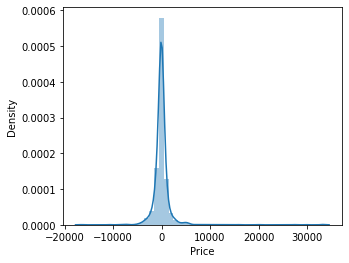

In [89]:
plt.figure(figsize=(5,4))
sns.distplot(y_test-prediction)
plt.show()

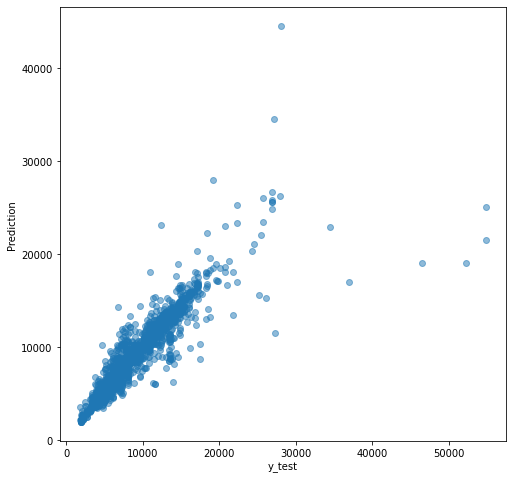

In [90]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("Prediction")
plt.show()

In [92]:
print("MAE:",mean_absolute_error(y_test,prediction))
print("MSE:",mean_squared_error(y_test,prediction))
print("RMSE:",np.sqrt(mean_squared_error(y_test,prediction)))

MAE: 9106.468652358757
MSE: 105648253.0067093
RMSE: 10278.533601964305


# Save the model to reuse it

In [93]:
import pickle
file=open('flight_rf.pkl','wb')
#Dump information to that file
forest=pickle.dump(rf,file)

In [95]:
model=open('flight_rf.pkl','rb')
forest=pickle.load(model)

In [96]:
y_prediction=forest.predict(x_test)

In [97]:
r2_score(y_test,y_prediction)

0.8340202452245014